# Homework 2_1. Numpy and matplotlib

***Double Click here to edit this cell***

- Name: 김수연
- Student ID: 201800839
- Submission date: 2020 4/10

## Remark. Use numpy wherever it is possible. 


## Total: 45 pts

## Problem 1 (5 pts)

- The centroid of a finite set of $\displaystyle {k}$ points $\displaystyle \mathbf {x} _{1},\mathbf {x} _{2},\ldots ,\mathbf {x} _{k}$ in $\displaystyle \mathbb {R} ^{n}$ is
$$
\mathbf {C} ={\frac {\mathbf {x} _{1}+\mathbf {x} _{2}+\cdots +\mathbf {x} _{k}}{k}}
$$

- This point minimizes the sum of squared Euclidean distances between itself and each point in the set.
- Compute centroid
- Plot dataset and centroid 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_centroid(data):
    """ data numpy에 대해서 axis=0 방향으로 sum한 뒤, 점 개수만큼 나눠서 평균값을 구한다.
        평균값의 x,y 좌표를 빨간 네모점으로 표시."""
    x = data[:,0]
    y = data[:,1]
    
    plt.scatter(x, y)
    num = x.size
    ctrd = (np.sum(data, axis=0)) / num  # centroid
    plt.scatter(ctrd[0], ctrd[1], c = 'red', marker = 's')
    
# YOUR CODE MUST BE HERE

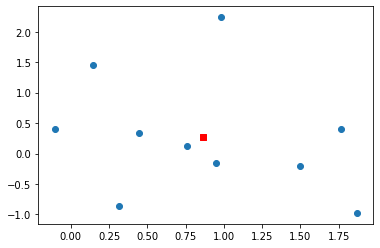

In [2]:
# DO NOT EDIT THIS CELL
np.random.seed(0)
data = np.random.randn(10,2)
plot_centroid(data)

**You output must be:**

<img src="hw2_1.png">

## Problem 2 (10 pts)

- Let $\textstyle x_{1},x_{2},\cdots ,x_{n}$ be a set of $\textstyle n$ points in a space with a distance function $d$. 
- Medoid is defined as
$$
x_{\text{medoid}} = \text{argmin}_{y \in \{x_1, x_2, \cdots, x_n\}} \sum_{i=1}^{n}d(y, x_i)
$$
- Compute medoid using Euclidean distance as a distance function.
- Plot dataset and medoid
- *Do not use sklearn, scipy or any module computing distance matrix directly*
- Use numpy functions only

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_medoid(data):
    """data에서 x좌표값과 y좌표값을 따로 분리해서 2차원([:,np.newaxis])으로 만든다.
       x배열과 x배열의 전치행렬의 차를 제곱한다.
       y배열과 y배열의 전치행렬의 차를 제곱한다.
       그리고 제곱한 두 배열을 더하여 루트를 씌워주고, axis=0으로 sum.
               = (해당 index의 점과 다른 점들 간의 거리를 모두 더한 것)
       그것을 distance array(darr)라고 한다.
       배열에서 가장작은 원소의 index값을 argmin()으로 찾는다.
               = (medoid가 되는 점의 inxdex)
               
       +
       점 그래프를 그릴때,
       1. 아래의 (0)을 이용하여 전체 점을 그리고, medoid 점을 한번 덧그리기
       2. medoid 점을 찾아 그리고, medoid를 제외한 점을 (1), (2)를 이용해서 그리기
       위의 두가지 방법이 있는데, 2번 방법을 이용했다.
       """
    x = data[:,0]
    y = data[:,1]
    
    #plt.scatter(x,y) # ....(0)
    
    xarr = x[:, np.newaxis]
    yarr = y[:, np.newaxis]
    
    darr = np.sqrt((xarr - xarr.T)**2 + (yarr - yarr.T)**2).sum(axis=0)
    md_index = np.argmin(darr)
    md = data[md_index, :]
    
    plt.scatter(md[0], md[1], c = 'red', marker = 's')
    plt.scatter(x[0:md_index], y[0:md_index], c = 'C0') # ...(1)
    plt.scatter(x[md_index+1:], y[md_index+1:], c = 'C0') # ...(2)
 
 # YOUR CODE MUST BE HERE

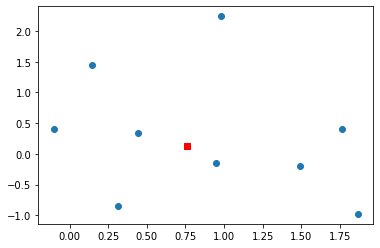

In [4]:
# DO NOT EDIT THIS CELL
np.random.seed(0)
data = np.random.randn(10,2)
plot_medoid(data)

**You output must be:**

<img src="hw2_2.png">

## Sample code

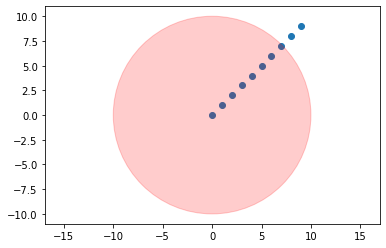

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def sample_code():
    x = np.arange(10)
    y = np.arange(10)
    center = (0, 0)
    radius = 10
    plt.scatter(x, y)
    ax = plt.gca()
    ax.add_patch(plt.Circle(center, radius, color='r', alpha=0.2))
    plt.axis('equal')
    plt.show()
    
sample_code()

## Problem 3 (5 pts)

- We want to draw a scatter plot using **data**
- Plot the center using a green square symbol
- Plot points inside **radius** from center using red dots
- Plot points out of the **radius** from center using 'C0' colored dots
- Draw a filled circle centered at **center** using red color and alpha=0.2

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def points_within_radius(data, center, radius):
    """ (data x좌표)-(center x좌표)의 제곱 + (data y좌표)-(center y좌표)의 제곱
        위의 값에 루트를 취한 배열을 distance라고 한다.
                = (center와 점들간의 거리)
        argwhere이용
        (x,y)와 center 사이의 거리가 radius 이하인 원소 index -> inside_index
        (x,y)와 center 사이의 거리가 radius 초과인 원소 index -> outside_index
        
        <그림>
        center는 초록색 네모 점
        inside_index에 해당하는 data는 빨간색 둥근 점
        outside_index에 해당하는 data는 파란색 둥근 점"""
    ax = plt.gca()
    ax.add_patch(plt.Circle(center, radius, color='r', alpha=0.2))
    plt.axis('equal')
    
    #center와의 거리
    distance = np.sqrt((data[:,0] - center[0])**2 + (data[:,1] - center[1])**2)
    
    # (x, y)와 center의 거리가 radius이하인지 초과인지에 따라 나눈다.
    inside_index = np.argwhere(distance <= radius)
    outside_index = np.argwhere(distance > radius)
    
    plt.scatter(data[inside_index,0], data[inside_index,1], c = 'red')
    plt.scatter(data[outside_index,0], data[outside_index,1], c = 'C0')

    plt.scatter(center[0], center[1], c = 'green', marker = 's')

# YOUR CODE MUST BE HERE

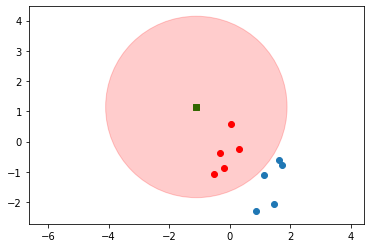

In [7]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10,2)
radius = 3.0
center = np.random.randn(2)
points_within_radius(data, center, radius)

**You output must be:**

<img src="hw2_3.png">

## Problem 4 (10 pts)

- We want to find k nearest points from the center
- Plot the center using a green square symbol
- Plot k-nearest points from center using red dots
- Plot other points using 'C0' colored dots
- Draw a filled circle centered at **center** using red color and alpha=0.2
- *Do not use sklearn, scipy or any module computing k-nearest points directly*
- Use numpy functions only

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def points_k_nearest(data, center, k=1):
    """ k번째로 가까운 점 = distance가 k번째로 작은 점
                          = 실제 배열에서는 k-1번째로 작은 점(0부터 시작)
        data의 점들과 center사이의 거리를 구해서 distance 배열 구하기
        
        argpartition 이용해서 k-1번째 기준으로 partition된 distance배열의 index 배열 구하기
        index 배열의 k-1번째 원소 => k번째로 가까운 점의 index
        distance[k번째로 가까운 점의 index] = radius
        
        argwhere이용
        distance가 radius 이하인 원소 index -> inside_index
        distance가 radius 초과인 원소 index -> outside_index
        
        <그림>
        inside_index에 해당하는 data -> 빨간 둥근 점
        outside_index에 해당하는 data -> 파란 둥근 점
        center -> 초록 네모 점
        Circle의 radius는 코드에서 새로 설정된 만큼(kth)
        """
    #center와의 거리
    distance = np.sqrt((data[:,0] - center[0])**2 + (data[:,1] - center[1])**2)
    k_partindex = np.argpartition(distance, k-1)
    radius = distance[k_partindex[k-1]]
    
    inside_index = np.argwhere(distance <= radius)
    outside_index = np.argwhere(distance > radius)
    
    plt.scatter(data[inside_index,0], data[inside_index,1], c = 'red')
    plt.scatter(data[outside_index,0], data[outside_index,1], c = 'C0')
    plt.scatter(center[0], center[1], c = 'green', marker = 's')
    
    ax = plt.gca()
    ax.add_patch(plt.Circle(center, radius, color='r', alpha=0.2))
    plt.axis('equal')
    
# YOUR CODE MUST BE HERE

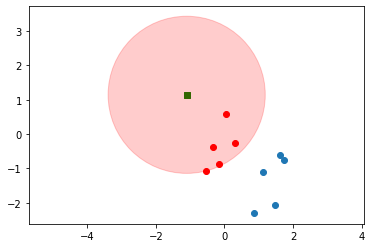

In [9]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10,2)
k = 5
center = np.random.randn(2)
points_k_nearest(data, center, k)

**You output must be:**

<img src="hw2_4.png">

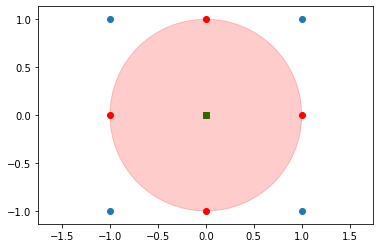

In [10]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.array([[1.,0.],[0.,1.],[-1.,0.],[0.,-1.],[1.,1.],[1.,-1.],[-1.,1.],[-1.,-1.]])
np.random.shuffle(data)
k = 1
center = np.array([0.,0.])
points_k_nearest(data, center, k)

**You output must be:**

<img src="hw2_5.png">

## Problem 5 (15 pts)

- **find_k_nearest_index** returns the index of the k-nearest
- We want to time the execution
- *Do not use sklearn, scipy or any module computing k-nearest points directly*
- Use numpy functions only
- Points: 
    - less than or equal to 1000ms: 15 pts
    - less than or equal to 10s: 10 pts
    - greater than 10s: 5 pts

In [11]:
import numpy as np

def find_k_nearest_index(data, center, k=1):
    """ center와 data 점들 사이의 거리를 구해 distance 배열 만들기.
        
        k번째로 가까운 점 = distance가 k번째로 작은 점
                          = 실제 배열에서는 distance가 k-1번째로 작은 점
                          
        argpartition 이용
        distance에서 k-1번째로 작은 원소를 기준으로 partition하고 그 인덱스 반환
        index를 처음부터 k-1번째까지 출력(k_partindex[0:k])"""
    # center와의 거리 
    distance = np.sqrt((data[:,0] - center[0])**2 + (data[:,1] - center[1])**2)
    k_partindex = np.argpartition(distance, k-1)

    return np.int32(k_partindex[0:k])

# YOUR CODE MUST BE HERE

In [12]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10000000,2)   # 10 million data
k = 5
center = np.random.randn(2)
%time find_k_nearest_index(data, center, k)

Wall time: 348 ms


array([4362536, 6716705, 6845205, 7607470, 3146213])

**Your time must be around:**
```
Wall time: 419 ms
```
**You output must be:**
```
array([3146213, 4362536, 6716705, 6845205, 7607470])
```

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview"
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted
- Your homework will be graded on the basis of correctness and programming skills